In [1]:
import pandas as pd
import numpy as np
import matplotlib
from funktionen import *
import seaborn as sns
sns.set(style="white") #"white", "darkgrid"...
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Daten1 = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_P2017_ber')

In [3]:
Daten1.shape

(68, 328)

In [4]:
Daten1.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q8b22a_6,D-Q8b22a_7_TEXT,D-Q8b22b,D-Q8b22c,D-Q9_1,D-Q9_2,E-Q1,Q3_3_TEXT - Topics,A-Q1 - Topics,porc_nan
0,09.11.2017 13:10,09.11.2017 13:25,0,88.3.172.215,100,909,1,09.11.2017 13:25,R_1kOiXpqqaX3Irxm,0,...,0,0,0,0,0,1,Gratificante y útil,0,Unknown,55.251142
1,10.11.2017 01:39,10.11.2017 01:54,0,212.128.135.110,100,897,1,10.11.2017 01:54,R_1F5FzvY7aYwiipy,0,...,0,0,0,0,0,1,Una encuesta muy completa que me ha servido pa...,0,Unknown,54.794521
2,10.11.2017 02:23,10.11.2017 02:39,0,212.128.135.84,100,935,1,10.11.2017 02:39,R_2ErWjTyNYcSh10N,0,...,0,0,0,0,0,1,0,0,Unknown,56.164384


Glossar erstellen = Datei aufrufen (in anderem Notebook erstellt + gespeichert)

In [5]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss')

Funktion, um Index (Name) einer Bezeichnung im Glossar zu finden:

In [6]:
def get_name_gloss(word):
    for i, val in enumerate(gloss[0]):
        if word.lower() in str(val).lower():
            return i, gloss.index[i]

Funktion, um Bezeichnung von Index im Glossar zu finden:

In [7]:
def get_name_glossind(word):
    for i, val in enumerate(gloss.index):
        if word.lower() in str(val).lower():
            return i, gloss.loc[val][0]

In [8]:
get_name_glossind('A-Q1')

(17,
 'Probablemente, en este texto encuentre palabras o grupos de palabras que no conoce aún. Sin embar...')

Liste erstellen:

In [9]:
Liste_A_Q2 = [col for col in Daten1.columns if 'A-Q2' in col]

In [10]:
Liste_A_Q3 = [col for col in Daten1.columns if 'A-Q3' in col]
Liste_A_Q3.pop(3)

'A-Q3_3_TEXT'

In [11]:
Liste_C_Q1 = [col for col in Daten1.columns if 'C-Q1' in col]

Funktion erstellen:

Name + in Klammer Variablen
* fig = Figur/Grafik; plt = Library matplotlib aufrufen (hier wird Platz für Grafik reserviert)
* i = Nummer der Figuren - gleiche Reihenfolge wie Spalten (=col) der Liste
* enumerate = Liste durchgehen
* plt.subplot = der Reihe nach Grafiken erstellen, n Zeilen, n Spalten
* plt.hist = erstellt Histogram für angegebene Daten; .dropna -> fehlende Werte weglassen
* plt.title = Titel hinzufügen
* plt.show = Grafiken anzeigen

In [26]:
def graf_likert1(D,l,sy):

    likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']

    df = D[l].apply(pd.value_counts).T
    if 0 in df.columns:
        df = df.drop(0, axis=1)
    
    middles = df[[1, 2]].sum(axis=1)+df[3]*.5
    longest = middles.max()
    complete_longest = df.sum(axis=1).max()
    df.insert(0, '', (middles - longest).abs())

    df.plot.barh(stacked=True, figsize=(8,sy), color=likert_colors, edgecolor='none', legend=False)
    z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
    z.set_zorder(-1)

    plt.show()

In [12]:
Daten = Daten1[Daten1['Finished']=='1']

In [13]:
Daten = Daten.fillna(0)

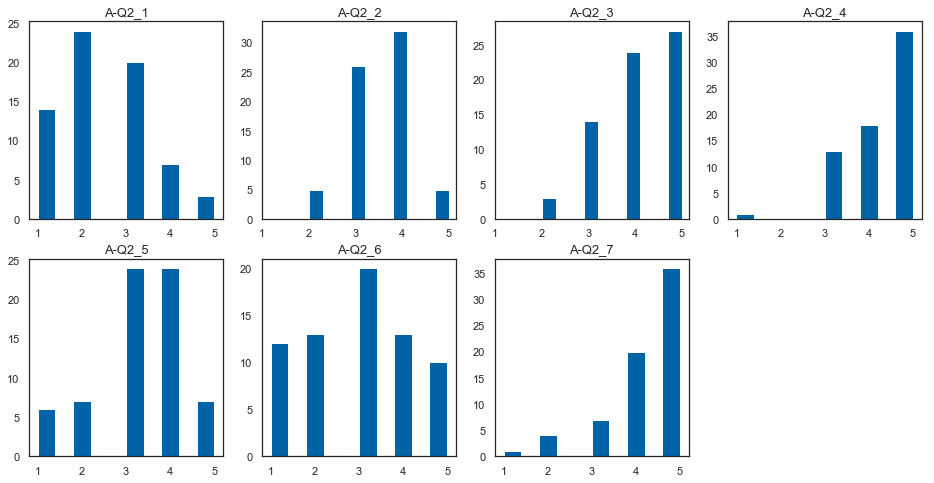

In [14]:
graf_hist(Daten1,Liste_A_Q2,16,8,2,4)

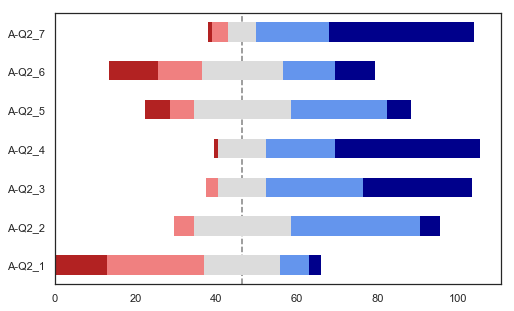

In [15]:
graf_likert(Daten,Liste_A_Q2,5)

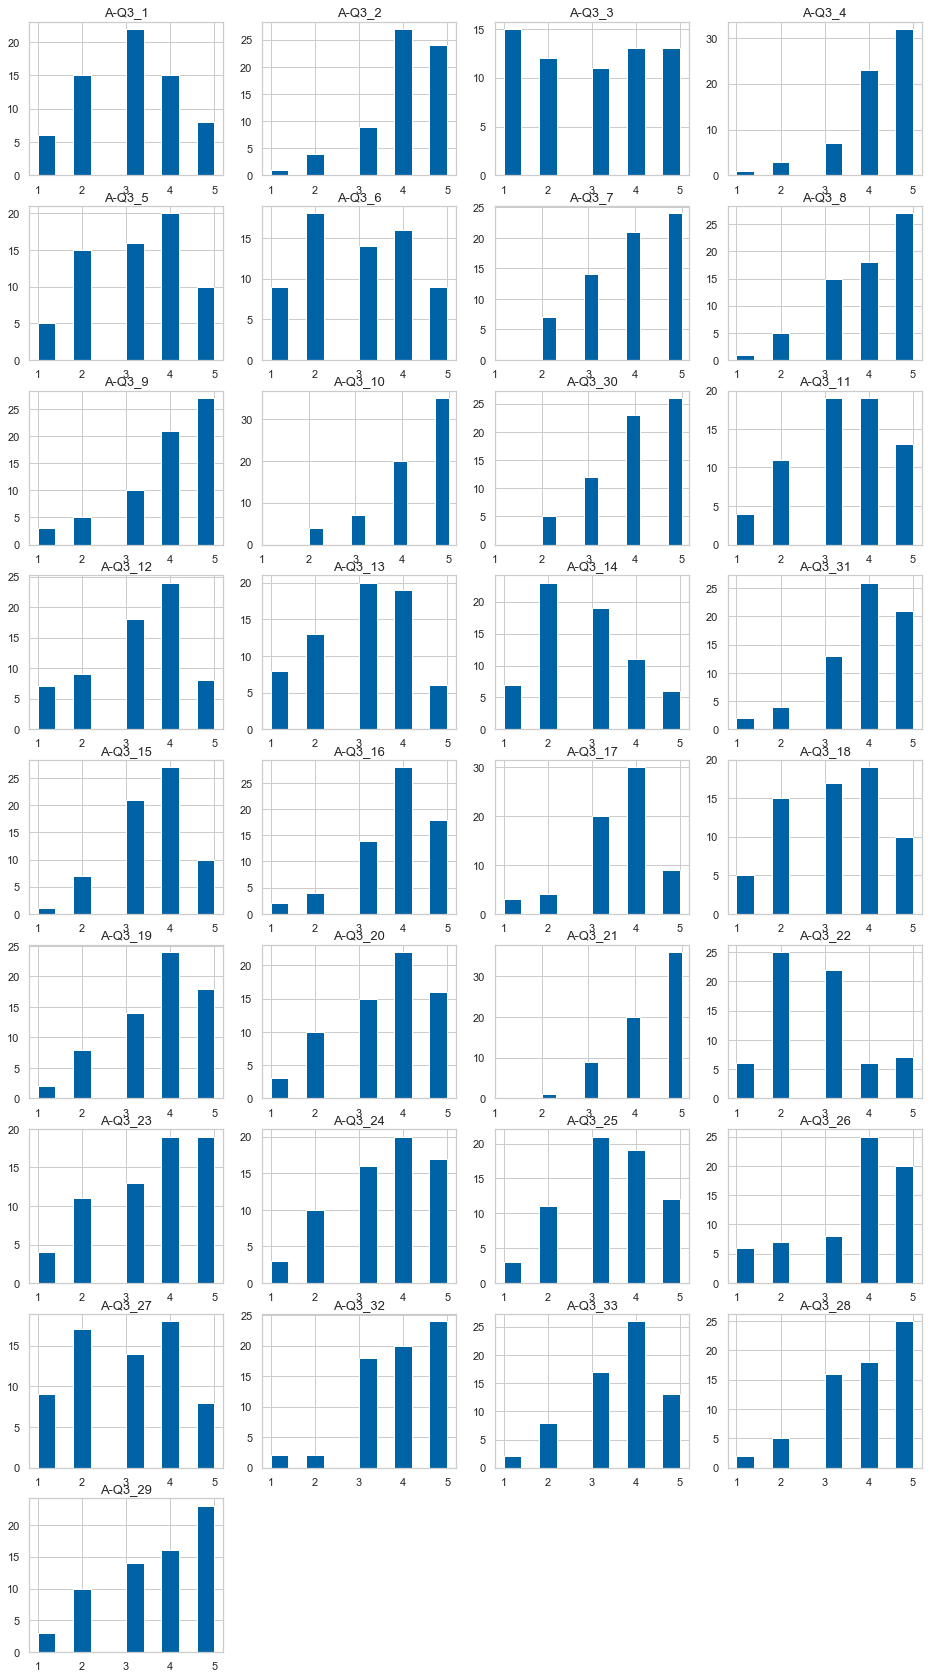

In [18]:
graf_hist(Daten,Liste_A_Q3,16,30,9,4)

In [23]:
Daten_A3 = Daten[Liste_A_Q3].astype(int64)

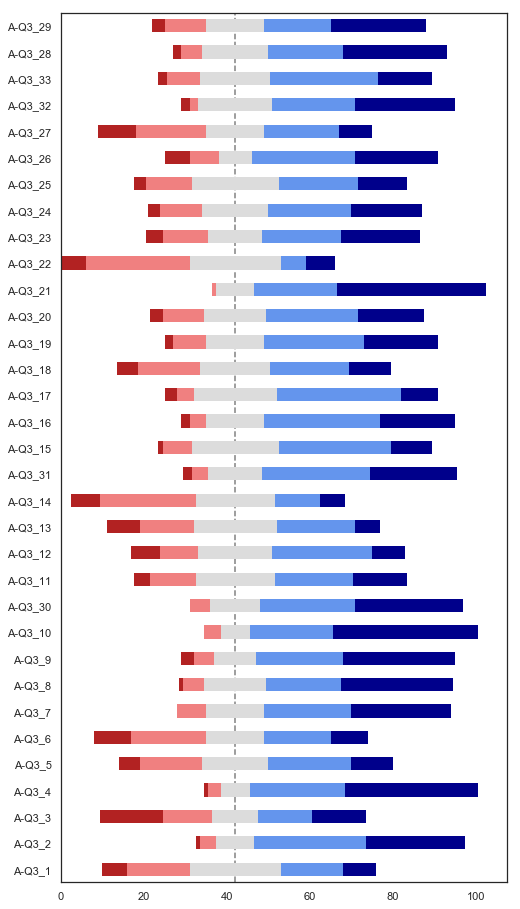

In [28]:
graf_likert1(Daten_A3,Liste_A_Q3,16)

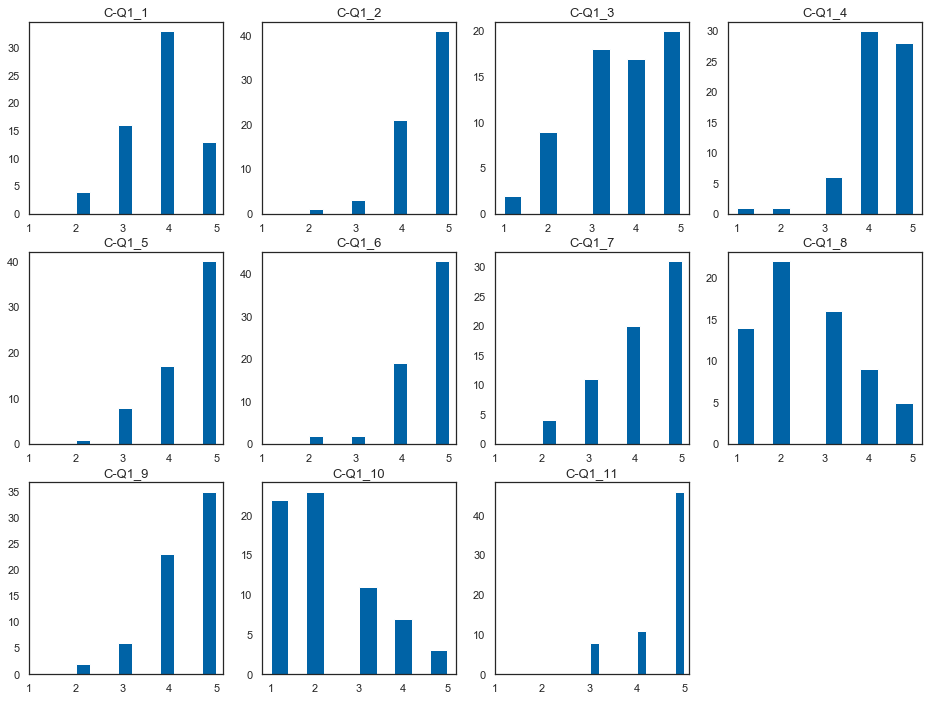

In [32]:
graf_hist(Daten,Liste_C_Q1,16,12,3,4)

In [30]:
Daten_C = Daten[Liste_C_Q1].astype(int64)

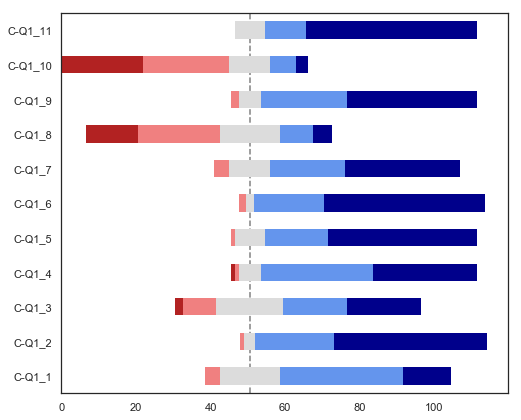

In [31]:
graf_likert1(Daten_C,Liste_C_Q1,7)

### Korrelation

Funktion für Korrelationen:

In [17]:
def get_Korr_M(Dat,l):
    return pd.DataFrame(np.corrcoef(Dat[l].dropna().T),columns = l, index = l)

Korrelation für A_Q2:

In [18]:
Korr_A_Q2 = get_Korr_M(Daten1,Liste_A_Q2)

Korrelation für A_Q3:

In [19]:
Korr_A_Q3 = get_Korr_M(Daten,Liste_A_Q3)

In [20]:
Korr_C_Q1 = get_Korr_M(Daten,Liste_C_Q1)

Funktion, um Daten mit bestimmtem Korrelationswert (z.B. über 0,5) zu bekommen:

In [21]:
def get_max_corr(df,col,lim = 0.5):
    return df[(df[col] > lim) & (df[col].dropna() < 0.99)][col]

In [22]:
get_max_corr(Korr_A_Q3,'A-Q3_1', lim = 0.4)

A-Q3_2     0.414249
A-Q3_12    0.412602
Name: A-Q3_1, dtype: float64

In [23]:
for col in Liste_A_Q3:
    print(get_max_corr(Korr_A_Q3,col,0.7))

Series([], Name: A-Q3_1, dtype: float64)
Series([], Name: A-Q3_2, dtype: float64)
Series([], Name: A-Q3_3, dtype: float64)
Series([], Name: A-Q3_4, dtype: float64)
Series([], Name: A-Q3_5, dtype: float64)
Series([], Name: A-Q3_6, dtype: float64)
Series([], Name: A-Q3_7, dtype: float64)
A-Q3_9    0.750992
Name: A-Q3_8, dtype: float64
A-Q3_8    0.750992
Name: A-Q3_9, dtype: float64
Series([], Name: A-Q3_10, dtype: float64)
Series([], Name: A-Q3_30, dtype: float64)
Series([], Name: A-Q3_11, dtype: float64)
Series([], Name: A-Q3_12, dtype: float64)
Series([], Name: A-Q3_13, dtype: float64)
Series([], Name: A-Q3_14, dtype: float64)
Series([], Name: A-Q3_31, dtype: float64)
Series([], Name: A-Q3_15, dtype: float64)
Series([], Name: A-Q3_16, dtype: float64)
Series([], Name: A-Q3_17, dtype: float64)
Series([], Name: A-Q3_18, dtype: float64)
Series([], Name: A-Q3_19, dtype: float64)
Series([], Name: A-Q3_20, dtype: float64)
Series([], Name: A-Q3_21, dtype: float64)
Series([], Name: A-Q3_22, dty

In [24]:
get_max_corr(Korr_C_Q1,'C-Q1_1', lim = 0.4)

C-Q1_4    0.46239
Name: C-Q1_1, dtype: float64

In [25]:
for col in Liste_C_Q1:
    print(get_max_corr(Korr_C_Q1,col,0.5))

Series([], Name: C-Q1_1, dtype: float64)
C-Q1_9    0.548419
Name: C-Q1_2, dtype: float64
Series([], Name: C-Q1_3, dtype: float64)
Series([], Name: C-Q1_4, dtype: float64)
Series([], Name: C-Q1_5, dtype: float64)
Series([], Name: C-Q1_6, dtype: float64)
Series([], Name: C-Q1_7, dtype: float64)
Series([], Name: C-Q1_8, dtype: float64)
C-Q1_2    0.548419
Name: C-Q1_9, dtype: float64
Series([], Name: C-Q1_10, dtype: float64)
Series([], Name: C-Q1_11, dtype: float64)


### Cronbach's Alpha berechnen

In [26]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    calpha = nitems / float(nitems-1) * (1 - itemvars.sum() / float(tscores.var(ddof=1)))

    return calpha

In [27]:
CronbachAlpha(Daten[Liste_A_Q3].fillna(3))

0.8850237739074688

In [28]:
Liste_A_Q = Liste_A_Q2 + Liste_A_Q3

In [29]:
Liste_AC_Q = Liste_A_Q + Liste_C_Q1

In [30]:
CronbachAlpha(Daten[Liste_AC_Q])

0.891737311451355

In [70]:
CronbachAlpha(Daten[Liste_C_Q1])

0.49693554461383954

In [71]:
CronbachAlpha(Daten1[Liste_A_Q2])

0.4473818842247971

In [72]:
Liste_A_Q_test = Liste_A_Q3[:10]

einzelne Elemente für Liste auswählen: Name der Liste = [Bezeichnung, Bezeichnung]

* von ... bis... = Name der Liste[Zeile:Zeile]
* ab ... = Name der Liste[Zeile:]
* bis ... = Name der Liste[:Zeile]

In [73]:
CronbachAlpha(Daten1[Liste_A_Q3[14:21]])

0.8430459756107469

In [74]:
CronbachAlpha(Daten1[Liste_C_Q1[2:8]])

0.7893904616169344

### Zeitanalyse

In [75]:
Dur = pd.to_numeric(Daten['Duration (in seconds)'])

In [76]:
Dur.describe()

count        66.000000
mean      19404.681818
std       86099.689619
min         663.000000
25%        1093.250000
50%        1333.000000
75%        1769.500000
max      603273.000000
Name: Duration (in seconds), dtype: float64

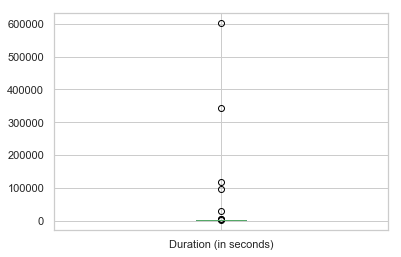

In [77]:
Dur.plot.box()

Überblick über die Beantwortungszeit und Darstellung in einem Boxplot, um Outlyers zu erkennen -> sollen nicht mit berücksichtigt werden (z.B. TN, die an einem Tag begonnen und später beendet haben...)

sinnvoll ist, eine Grenze bei ca. einer Stunde Beantwortungszeit (3600 sek) festzulegen

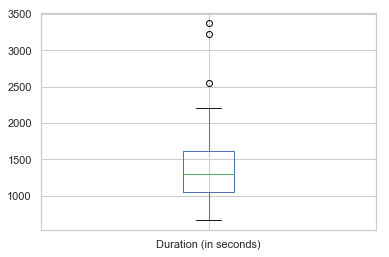

In [78]:
Dur[Dur < 4000].plot.box();

In [79]:
Dur[Dur < 4000].describe()

count      60.000000
mean     1403.333333
std       526.673754
min       663.000000
25%      1059.500000
50%      1305.500000
75%      1614.000000
max      3380.000000
Name: Duration (in seconds), dtype: float64

In [80]:
(Dur[Dur < 4000].mean())/60

23.38888888888889

In [81]:
(Dur[Dur < 4000].min())/60

11.05

In [82]:
(Dur[Dur < 4000].max())/60

56.333333333333336

In [83]:
(Dur[Dur < 4000].std())/60

8.777895896604486

Schlussfolgerung:

durchschnittliche Beantwortungszeit liegt bei ca. 23min, wobei berücksichtigt werden muss, dass TN außerhalb des Unterrichts Pausen einlegen konnten und dass z.T. bei der Beantwortung im Unterricht mehr Zeit für Erklärungen/Einloggen/Abwarten... verwendet wurde

### Charakteristika der Stichprobe

In [ ]:
Daten['D-Q2'].value_counts().plot(kind = 'bar', figsize = (3,5), width = 0.3, legend = True, title = "Studium");

(1) Grado, (2) Master

In [33]:
Daten['D-Q2'].value_counts()

1    59
2     7
Name: D-Q2, dtype: int64

C:\Users\Martina\Anaconda3\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


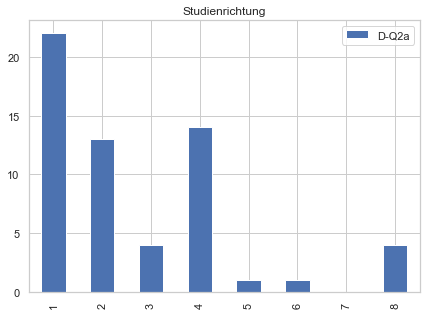

In [34]:
Daten['D-Q2a'].value_counts()[[1,2,3,4,5,6,7,8]].plot(kind='bar', figsize = (7,5), width = 0.5, legend = True, title = "Studienrichtung");

In [35]:
Daten['D-Q2a'].value_counts()

1    22
4    14
2    13
0     7
8     4
3     4
6     1
5     1
Name: D-Q2a, dtype: int64

(1)	Estudios Alemanes / Filología Alemana (Germanistikstudium / deutsche Philologie),
(2)	Otras Filologías (Anderes Philologiestudium),
(3)	Traducción, Alemán 1a Lengua Extranjera / B (Übersetzen und Dolmetschen, Erste Fremdsprache / Sprache B),
(4)	Traducción, Alemán 2a Lengua Extranjera / C (Übersetzen und Dolmetschen, Zweite Fremdsprache / Sprache C),
(5)	Humanidades (Humanistisches Studium),
(6)	Economía (Wirtschaftliches Studium),
(7)	Turismo (Tourismus-Studium),
(8)	Otra (Andere)

In [36]:
Daten['D-Q2a_8_TEXT'].value_counts()

0                                                                                      62
Grado en Ingeniería Informática                                                         1
Doble grado en Traducción e Interpretación y Derecho (Alemán 2a Lengua Extranjera)      1
Traducción, inglés+francés                                                              1
filología hispánica                                                                     1
Name: D-Q2a_8_TEXT, dtype: int64

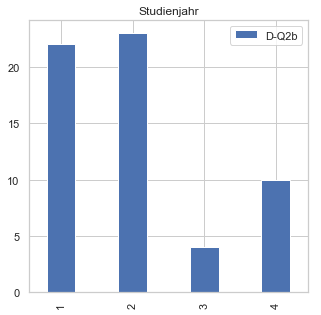

In [37]:
Daten['D-Q2b'].value_counts()[[1,2,3,4]].plot(kind='bar', figsize = (5,5), width = 0.4, legend = True, title = "Studienjahr");

In [38]:
Daten['D-Q2b'].value_counts()[[1,2,3,4]]

1    22
2    23
3     4
4    10
Name: D-Q2b, dtype: int64

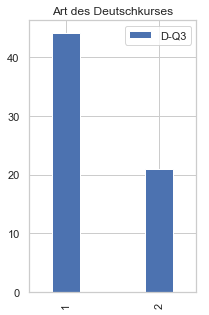

In [39]:
Daten['D-Q3'].value_counts()[[1,2]].plot(kind = 'bar', figsize = (3,5), width = 0.3, legend = True, title = "Art des Deutschkurses");

(1) Pflichtfach, (2) Wahlfach

In [40]:
Daten['D-Q3'].value_counts()

1    44
2    21
0     1
Name: D-Q3, dtype: int64

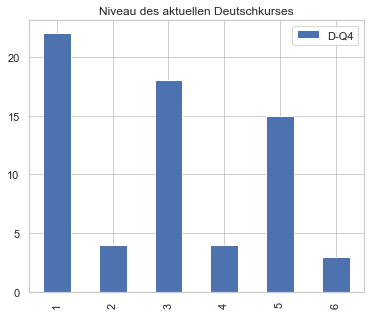

In [41]:
Daten['D-Q4'].value_counts()[[1,2,3,4,5,6]].plot(kind='bar', figsize = (6,5), width = 0.5, legend = True, title = "Niveau des aktuellen Deutschkurses");

(1)	A1, 
(2)	A2, 
(3)	B1, 
(4)	B2, 
(5)	C1,
(6)	C2 

In [42]:
Daten['D-Q4'].value_counts()

1    22
3    18
5    15
4     4
2     4
6     3
Name: D-Q4, dtype: int64

In [43]:
Daten[Daten['D-Q5']!=0]['D-Q5'].describe()

count    64.00000
mean     20.34375
std       2.76152
min      17.00000
25%      18.75000
50%      19.00000
75%      22.00000
max      31.00000
Name: D-Q5, dtype: float64

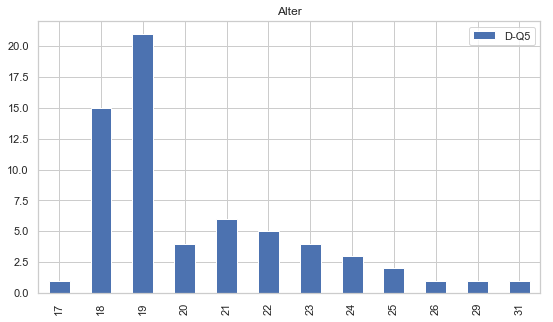

In [44]:
Daten[Daten['D-Q5']!=0]['D-Q5'].astype(integer).value_counts().sort_index().plot(kind='bar', figsize = (9,5), width = 0.5, legend = True, title = "Alter");

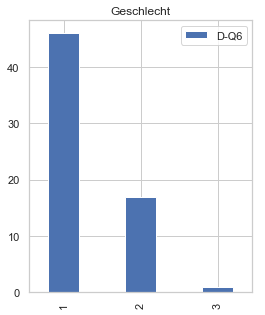

In [45]:
Daten['D-Q6'].value_counts()[[1,2,3]].plot(kind = 'bar', figsize = (4,5), width = 0.4, legend = True, title = "Geschlecht");

In [46]:
Daten['D-Q6'].value_counts()

1    46
2    17
0     2
3     1
Name: D-Q6, dtype: int64

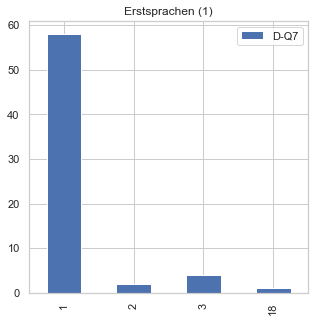

In [47]:
Daten['D-Q7'].value_counts()[[1,2,3,18]].plot(kind='bar', figsize = (5,5), width = 0.5, legend = True, title = "Erstsprachen (1)");

(1) 	Castellano,
(2) 	Catalán (Català), Valenciano (Valencià),
(3) 	Gallego (Galego),
(18)	Ruso (Русский)

In [48]:
Daten['D-Q7'].value_counts()

1     58
3      4
2      2
18     1
0      1
Name: D-Q7, dtype: int64

In [49]:
Daten['D-Q7b'].value_counts()

2    51
1    15
Name: D-Q7b, dtype: int64

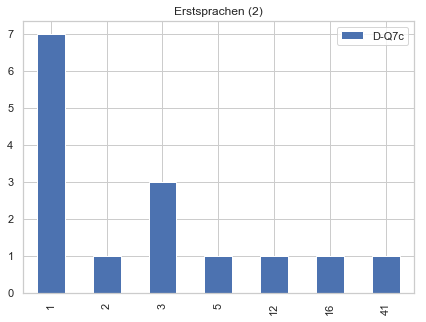

In [50]:
Daten['D-Q7c'].value_counts()[[1,2,3,5,12,16,41]].plot(kind='bar', figsize = (7,5), width = 0.5, legend = True, title = "Erstsprachen (2)");

(1) Castellano (Spanisch),
(2) Catalán (Català), Valenciano (Valencià),
(3) Gallego (Galego),
(5) Alemán (Deutsch),
(12) Inglés (English),
(16) Portugués (Português),
(41) Polaco (Polski)

In [65]:
Daten['D-Q7c'].value_counts()

0     51
1      7
3      3
41     1
16     1
12     1
5      1
2      1
Name: D-Q7c, dtype: int64

In [51]:
Daten['D-Q7e'].value_counts()

0    51
2    13
1     2
Name: D-Q7e, dtype: int64

In [52]:
Daten['D-Q7f'].value_counts()

0     64
44     1
12     1
Name: D-Q7f, dtype: int64

(44) Ukrainisch

In [53]:
cols = ['D-Q8_1','D-Q8_2','D-Q8_3','D-Q8_4','D-Q8_5','D-Q8_6','D-Q8_7']

In [54]:
Sprachen = Daten[cols]

In [55]:
DF_Spr = Sprachen.apply(pd.value_counts).fillna(0).astype(integer)
ix_sorted = list(DF_Spr[1:].sum(axis = 1).sort_values(ascending=False).index)

All = []
for i in DF_Spr.index:
    All.append((DF_Spr.loc[i]).sum())

DF_Spr['All'] = All

In [67]:
DF_Spr.loc[ix_sorted[:10]]

,D-Q8_1,D-Q8_2,D-Q8_3,D-Q8_4,D-Q8_5,D-Q8_6,D-Q8_7,All
12,54,8,0,1,0,0,0,63
5,5,12,25,8,10,2,0,62
10,0,34,10,3,0,0,1,48
21,1,4,16,11,2,2,0,36
13,0,1,0,9,5,4,4,23
20,0,1,2,7,8,2,0,20
15,0,0,1,2,2,2,3,10
16,1,1,2,2,1,2,0,9
18,0,0,1,1,3,3,0,8
14,0,0,1,1,0,1,1,4


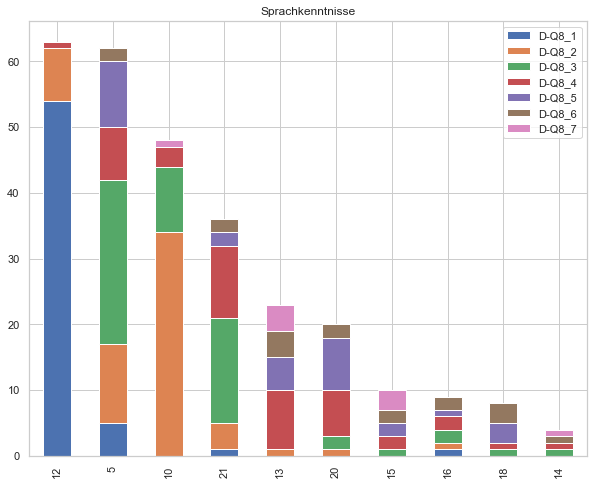

In [57]:
DF_Spr[cols].loc[ix_sorted[:10]].plot(kind='bar', figsize = (10,8), stacked = True, legend = True, title = "Sprachkenntnisse");

In [61]:
Anzahl_Sprachen = []

for i in Daten1.index:
    Spr_arr = Daten1[cols].loc[i].unique()
    Spr_arr = Spr_arr[Spr_arr != 0]
    Anzahl_Sprachen.append(len(Spr_arr))

In [62]:
Daten1['V_Spr_Zahl'] = Anzahl_Sprachen

In [64]:
Daten[Daten['V_Spr_Zahl']!=0]['V_Spr_Zahl'].describe()

count    64.000000
mean      4.765625
std       1.477258
min       2.000000
25%       4.000000
50%       5.000000
75%       6.000000
max       7.000000
Name: V_Spr_Zahl, dtype: float64